#Importing DataSet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C_data = pd.read_csv('Cab_Data.csv')
City= pd.read_csv('City.csv')
C_ID= pd.read_csv('Customer_ID.csv')
T_ID= pd.read_csv('Transaction_ID.csv')


#Dropping the NaN Value

In [ ]:
C_data = C_data.dropna()
City= City.dropna()
C_ID= C_ID.dropna()
T_ID= T_ID.dropna()



#Check for any outliers

In [ ]:
z = np.abs((C_data - C_data.mean()) / C_data.std())

# Find column names with any Z-score greater than 3 (an arbitrary threshold for outliers)
outliers = z > 3
cols_with_outliers = outliers.any()

# Print the column names with outliers
print(cols_with_outliers[cols_with_outliers == True].index.tolist())

<ipython-input-6-74b0e4a8c127>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs((C_data - C_data.mean()) / C_data.std())


['Price Charged']


In [ ]:
z = np.abs((City - City.mean()) / City.std())
outliers = z > 3
cols_with_outliers = outliers.any()
print(cols_with_outliers[cols_with_outliers == True].index.tolist())

[]


<ipython-input-7-acdf4a662d78>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs((City - City.mean()) / City.std())


In [ ]:
z = np.abs((C_ID - C_ID.mean()) / C_ID.std())
outliers = z > 3
cols_with_outliers = outliers.any()
print(cols_with_outliers[cols_with_outliers == True].index.tolist())

[]


<ipython-input-8-aa9e9e4f6abc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs((C_ID - C_ID.mean()) / C_ID.std())


In [ ]:
z = np.abs((T_ID - T_ID.mean()) / T_ID.std())
outliers = z > 3
cols_with_outliers = outliers.any()
print(cols_with_outliers[cols_with_outliers == True].index.tolist())

[]


<ipython-input-114-9443659fe957>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs((T_ID - T_ID.mean()) / T_ID.std())


#Price charged has an outlier but due to lack of information we will not consider that.

In [9]:
P_C=C_data[C_data['Company']=='Pink Cab']
Y_C=C_data[C_data['Company']=='Yellow Cab']

In [10]:
P_C['Profit']=P_C['Price Charged']-P_C['Cost of Trip']
total_profit_pc=P_C['Profit'].sum()
Total_rides_pc=P_C.shape[0]
profit_per_ride_pc=total_profit_pc/Total_rides_pc


Y_C['Profit']=Y_C['Price Charged']-Y_C['Cost of Trip']
total_profit_yc=Y_C['Profit'].sum()
Total_rides_yc=Y_C.shape[0]
profit_per_ride_yc=total_profit_yc/Total_rides_yc


<ipython-input-10-69e94ee2a318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P_C['Profit']=P_C['Price Charged']-P_C['Cost of Trip']
<ipython-input-10-69e94ee2a318>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_C['Profit']=Y_C['Price Charged']-Y_C['Cost of Trip']


In [11]:
Vis1=pd.DataFrame({'Profit':[total_profit_pc,total_profit_yc],'Total Rides':[Total_rides_pc,Total_rides_yc],'Profit Per Rides':[profit_per_ride_pc,profit_per_ride_yc]})
row_labels = ['Pink Cab', 'Yellow Cab']
df = Vis1.set_index([row_labels])

#We can observe Yellow cab is more profitable both in terms of total rides and profit per rides.

In [12]:
df

,Profit,Total Rides,Profit Per Rides
Pink Cab,5.307328e+06,84711,62.652174
Yellow Cab,4.402037e+07,274681,160.259986


#Data Head for pink cab and yellow cab.



In [13]:
P_C

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844
...,...,...,...,...,...,...,...,...
357449,10437610,43106,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,48.590
357450,10437611,43465,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,85.344
357451,10437612,43107,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,58.390
357452,10437614,43102,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,31.560


In [14]:
Y_C

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
233,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076
234,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768
235,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320
236,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600
237,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [15]:
grouped = P_C.groupby(['City'])
grouped_sum_pc = grouped.sum()['Profit']
pc1 = pd.DataFrame({'City': grouped_sum_pc.index, 'Profit': grouped_sum_pc.values})
pc1.columns = ['City', 'profit']

In [16]:
grouped = Y_C.groupby(['City'])
grouped_sum_yc = grouped.sum()['Profit']
yc1 = pd.DataFrame({'City': grouped_sum_yc.index, 'Profit': grouped_sum_yc.values})
yc1.columns = ['City', 'profit']

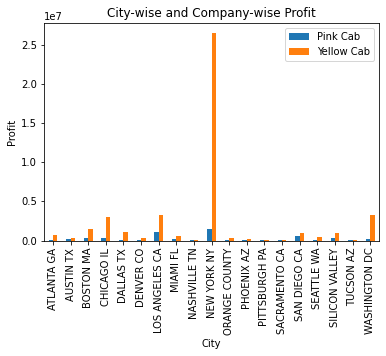

In [17]:
combined_df = pd.concat([pc1, yc1], keys=['Pink Cab', 'Yellow Cab'])

pivot_df = pd.pivot_table(combined_df, index='City', columns=combined_df.index.get_level_values(0), values='profit')
pivot_df.plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Profit')
plt.title('City-wise and Company-wise Profit')
plt.show()


#New york has the highest profit (Yellow Cab),also it can be easily seen in all the city's the profit of yellow cab is more.

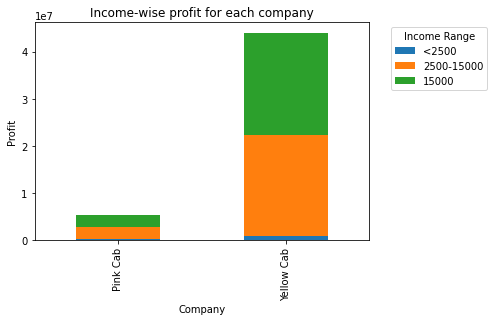

In [18]:
C_data['profit']=C_data['Price Charged']-C_data['Cost of Trip']
data = pd.merge(C_data, T_ID, on='Transaction ID')
data = pd.merge(data, C_ID, on='Customer ID')

# Define income ranges and group the data by company and income ranges
income_ranges = pd.cut(data['Income (USD/Month)'], bins=[0, 2500, 15000, 35000], labels=['<2500', '2500-15000', '15000'])
grouped = data.groupby(['Company', income_ranges])

# Calculate the total profit for each group
profit = grouped.sum()['profit']

# Create a bar plot with company name on the x-axis, profit on the y-axis, and income ranges as the different sections on each bar
ax = profit.unstack().plot(kind='bar', stacked=True)

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Profit')
ax.set_title('Income-wise profit for each company')

# Add section on each bar with salary ranges
ax.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Middle class(2500$ < Salary < 15000$) and rich class(salary > 15000$) are the main clients of both of the two cab companies.

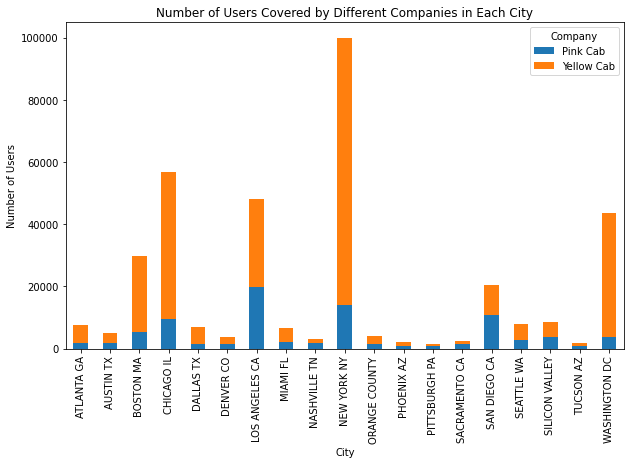

In [ ]:
merged_data = pd.merge(C_data, T_ID, on='Transaction ID')

# Group the data by company and city to count the number of users in each group
grouped_data = merged_data.groupby(['Company', 'City']).size().reset_index(name='count')

# Pivot the data to make it suitable for plotting a stacked bar chart
pivot_data = grouped_data.pivot(index='City', columns='Company', values='count')

# Plot a stacked bar chart of the number of users covered by different companies in each city
ax = pivot_data.plot.bar(stacked=True, figsize=(10, 6))

# Set the axis labels and title
ax.set_xlabel('City')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Users Covered by Different Companies in Each City')

# Show the plot
plt.show()






#City like San Diego, Sacramento , Pittsburgh,Nashville and Tuscson are dominated by the Pink Cab company, or Users prefer more pink cab in these towns.

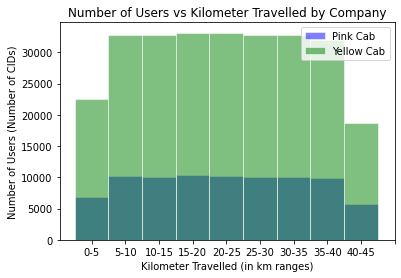

In [19]:
merged_data = pd.merge(C_data, T_ID, on='Transaction ID')

# Group the data by company and kilometer_travelled
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30','30-35','35-40','40-45']
merged_data['km_bins'] = pd.cut(merged_data['KM Travelled'], bins=bins, labels=labels)

colors = ['blue', 'green']
for i, company in enumerate(merged_data['Company'].unique()):
    company_data = merged_data[merged_data['Company'] == company]
    plt.hist(company_data['KM Travelled'], bins=bins, color=colors[i], alpha=0.5, label=company, width=5.0, align='left', edgecolor='white')

plt.xlabel('Kilometer Travelled (in km ranges)')
plt.ylabel('Number of Users (Number of CIDs)')
plt.title('Number of Users vs Kilometer Travelled by Company')
plt.xticks(bins, labels)
plt.legend()
plt.show()

#However we have the data only for a certain period we can see that yellow cab has more kilometers covered than Pink cab which mean it is used more by the customers.

#Note: The data set has column of 'Date of travel' which has values like 42377,42375... which does not match with the regular format of date dd/mm/yyyy.Hence the evaluation related to the date and time was not possible.

#Analysis and Hypothesis.


---



1.  Profit:In terms of overall profit yellow cab has 8% higher profit than pink cab
2.   Customers reach : Out of 19 cities, yellow cab is used more in 16 cities while one can see the dominance of pink cab in just 4 cities.
3.Income Wise: Both the cab has same distribution of providing services to low, medium and high income people however the distribution of yellow cab is much more clean.
4.KM-Wise Profit: Yellow Cab has more profit per km than of pink cab.

On the basis of my analysis,I recommend Yellow cab over the Pink Cab.



